### Big Data Processing Systems

<ol>**Hadoop/MapReduce**: Scalable and fault tolerant framework written in Java
    <li>Open Source</li>
    <li>Used a Batch Processing</li>
</ol>

<ol>**Apache Spark**: General purpose and lightning fast cluster computing system
    <li>Open Source</li>
    <li>Used as Batch Processing and Real Time Data Processing</li>
</ol>

### Features of Apache Spark Framework

<li>Distributed cluster computing framework</li>

![alt text](apache spark components.png)

### Spark mode of deployment

<li>**Local mode**: It is a single machine, such as the laptop. It is convenient for testing, debugging and demonstration</li>

<li>**Cluster mode**: Set of pre-defined machines, good for production</li>

### Spark Shell

<li>Interactive environment for running Spark jobs</li>
<li>Helpful for fast interactive prototyping</li>
<li>Spark's shell allows interacting with data on disk or in memory</li>

<ol>Three different Spark shells - 
    <li>Spark-shell for Scala</li>
    <li>PySpark-shell for Python</li>
    <li>SparkR for R</li>
</ol>

### Creating SparkContext object

In [1]:
from pyspark import SparkContext

sc = SparkContext()

In [2]:
# Print the version of SparkContext
print("The version of Spark Context in the PySpark shell is", sc.version)

# Print the Python version of SparkContext
print("The Python version of Spark Context in the PySpark shell is", sc.pythonVer)

# Print the master of SparkContext
print("The master of Spark Context in the PySpark shell is", sc.master)

The version of Spark Context in the PySpark shell is 2.4.0
The Python version of Spark Context in the PySpark shell is 3.6
The master of Spark Context in the PySpark shell is local[*]


### Interactive use of PySpark

In [3]:
# Create a python list of numbers from 1 to 100 
numb = range(1, 100)

# Load the list into PySpark  
spark_data = sc.parallelize(numb)

In [4]:
spark_data

PythonRDD[1] at RDD at PythonRDD.scala:53

### Loading data in PySpark Shell

In [5]:
# Load a local file into PySpark shell
lines = sc.textFile('Complete_Shakespeare.txt')

SparkContext's `textFile` method is quite powerful for creating distributed collections of unstructured data

## Functional Programming in Python

### Use of lambda with map

In [6]:
my_list = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

In [7]:
# Print my_list in the console
print("Input list is", my_list)

# Square all numbers in my_list
squared_list_lambda = list(map(lambda x: x**2, my_list))

# Print the result of the map function
print("The squared numbers are", squared_list_lambda)

Input list is [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
The squared numbers are [1, 4, 9, 16, 25, 36, 49, 64, 81, 100]


### Use of lambda with filter

In [8]:
my_list2 = [10, 21, 31, 40, 51, 60, 72, 80, 93, 101]

In [9]:
# Print my_list2 in the console
print("Input list is:", my_list2)

# Filter numbers divisible by 10
filtered_list = list(filter(lambda x: (x%10 == 0), my_list2))

# Print the numbers divisible by 10
print("Numbers divisible by 10 are:", filtered_list)

Input list is: [10, 21, 31, 40, 51, 60, 72, 80, 93, 101]
Numbers divisible by 10 are: [10, 40, 60, 80]


### PySpark RDD

<li>**Resilient**: ability withstand failure</li>
<li>**Distributed**: Spanning across multiple machines</li>
<li>**Datasets**: Collection of partitioned data e.g - Arrays, Tables, Tuples etc</li>

### How to create RDDs?

<ol>
    <li>Parallelizing an existing collection of objects using **sc.parallelize()**</li>
    <li>External Datasets: 
        <ol>Files in HDFS</ol>
        <ol>Objects in Amazon S3 bucket</ol>
        <ol>lines in a text file</ol>
    </li>
    <li>From existing RDDs</li>
    
</ol>

### RDDs from parallelized collections

In [10]:
# Create an RDD from a list of words
RDD = sc.parallelize(["Spark", "is", "a", "framework", "for", "Big Data processing"])

# Print out the type of the created object
print("The type of RDD is", type(RDD))

The type of RDD is <class 'pyspark.rdd.RDD'>


### RDDs from external datasets

In [11]:
# Create a fileRDD from file_path
fileRDD = sc.textFile("Complete_Shakespeare.txt")

# Check the type of fileRDD
print("The file type of fileRDD is", type(fileRDD))

The file type of fileRDD is <class 'pyspark.rdd.RDD'>


In [12]:
# Check the number of partitions in fileRDD
print("Number of partitions in fileRDD is", fileRDD.getNumPartitions())

# Create a fileRDD_part from file_path with 5 partitions
fileRDD_part = sc.textFile("Complete_Shakespeare.txt", minPartitions = 5)

# Check the number of partitions in fileRDD_part
print("Number of partitions in fileRDD_part is", fileRDD_part.getNumPartitions())

Number of partitions in fileRDD is 2
Number of partitions in fileRDD_part is 5


### RDD operations in PySpark

RDDs in PySpark supports two types of operations - 

<li>**Transformations**: Transformations create new RDDs e.g. map(), filter(), flatMap(), unions()</li>
<li>**Actions**: Actions perform computation on new RDDs e.g. collect(), take(), first(), count()</li>

In [13]:
numb = range(1, 10)
numbRDD = sc.parallelize(numb)

In [ ]:
# Create map() transformation to cube numbers
cubedRDD = numbRDD.map(lambda x: x**3)

# Collect the results
numbers_all = cubedRDD.collect()

# Print the numbers from numbers_all
for numb in numbers_all:
    print(numb)

### Filter and Count

In [ ]:
# Filter the fileRDD to select lines with Spark keyword
fileRDD_filter = fileRDD.filter(lambda line: 'Spark' in line)

# How many lines are there in fileRDD?
print("The total number of lines with the keyword Spark is", fileRDD_filter.count())

# Print the first four lines of fileRDD
for line in fileRDD_filter.take(4): 
    print(line)

### Pair RDDs in PySpark

In [ ]:
# Create PairRDD Rdd with key value pairs
Rdd = sc.parallelize([(1,2), (3,4), (3,6), (4,5)])

# Apply reduceByKey() operation on Rdd
Rdd_Reduced = Rdd.reduceByKey(lambda x, y: x + y)

# Iterate over the result and print the output
for num in Rdd_Reduced.collect(): 
    print("Key {} has {} Counts".format(num[0], num[1]))

### sortByKey and Collect

In [ ]:
# Sort the reduced RDD with the key by descending order
Rdd_Reduced_Sort = Rdd_Reduced.sortByKey(ascending=False)

# Iterate over the result and print the output
for num in Rdd_Reduced_Sort.collect():
    print("Key {} has {} Counts".format(num[0], num[1]))

### Advanced RDD Actions

<li>**reduce**: reduce(func) action is used for aggregating the elements of a regular RDD</li>
<li>**saveAsTextFile**: saveAsTextFile() action saves RDD into a text file inside a directory with each partition as a separate file</li>
<li>**coalesce**: coalesce() method can be used to save RDD in a single text file</li>

In [ ]:
Rdd = sc.parallelize([(1, 2), (3, 4), (3, 6), (4, 5)])

In [ ]:
# Transform the rdd with countByKey()
total = Rdd.countByKey()

# What is the type of total?
print("The type of total is", type(total))

# Iterate over the total and print the output
for k, v in total.items(): 
    print("key", k, "has", v, "counts")

### Create a base RDD and Transform it

In [ ]:
# Create a baseRDD from the file path
baseRDD = sc.textFile("Complete_Shakespeare.txt")

# Split the lines of baseRDD into words
splitRDD = baseRDD.flatMap(lambda x: x.split())

# Count the total number of words
print("Total number of words in splitRDD:", splitRDD.count())

### Removing stopwords and reducing the dataset

In [ ]:
# Convert the words in lower case and remove stop words from stop_words
splitRDD_no_stop = splitRDD.filter(lambda x: x.lower() not in stop_words)

# Create a tuple of the word and 1 
splitRDD_no_stop_words = splitRDD_no_stop.map(lambda w: (w, 1))

# Count of the number of occurences of each word
resultRDD = splitRDD_no_stop_words.reduceByKey(lambda x, y: x + y)

### Printing word frequencies

In [ ]:
# Display the first 10 words and their frequencies
for word in resultRDD.take(10):
    print(word)

# Swap the keys and values 
resultRDD_swap = resultRDD.map(lambda x: (x[1], x[0]))

# Sort the keys in descending order
resultRDD_swap_sort = resultRDD_swap.sortByKey(ascending=False)

# Show the top 10 most frequent words and their frequencies
for word in resultRDD_swap_sort.take(10):
    print("{} has {} counts". format(word[1], word[0]))

## Spark DataFrames

### Converting RDD to DataFrame

In [15]:
from pyspark.sql import SparkSession

spark = SparkSession.builder.getOrCreate()

In [ ]:
# Create a list of tuples
sample_list = [('Mona', 20), ('Jennifer', 34), ('John', 20), ('Jim', 26)]

# Create a RDD from the list
rdd = sc.parallelize(sample_list)

# Create a PySpark DataFrame
names_df = spark.createDataFrame(rdd, schema=['Name', 'Age'])

# Check the type of people_df
print("The type of names_df is", type(names_df))

### Loading CSV into DataFrame 

In [16]:
# Create an DataFrame from file_path
people_df = spark.read.csv("people.csv", header=True, inferSchema=True)

# Check the type of people_df
print("The type of people_df is ", type(people_df))

The type of people_df is  <class 'pyspark.sql.dataframe.DataFrame'>


### Inspecting Data with PySpark DataFrames

In [17]:
# Print the first 10 observations 
people_df.show(10)

# Count the number of rows 
print("There are {} rows in the people_df DataFrame.".format(people_df.count()))

# Count the number of columns and their names
print("There are {} columns in the people_df DataFrame and their names are {}".format(len(people_df.columns), people_df.columns))

+---+---------+----------------+------+-------------+
|_c0|person_id|            name|   sex|date of birth|
+---+---------+----------------+------+-------------+
|  0|      100|  Penelope Lewis|female|   1990-08-31|
|  1|      101|   David Anthony|  male|   1971-10-14|
|  2|      102|       Ida Shipp|female|   1962-05-24|
|  3|      103|    Joanna Moore|female|   2017-03-10|
|  4|      104|  Lisandra Ortiz|female|   2020-08-05|
|  5|      105|   David Simmons|  male|   1999-12-30|
|  6|      106|   Edward Hudson|  male|   1983-05-09|
|  7|      107|    Albert Jones|  male|   1990-09-13|
|  8|      108|Leonard Cavender|  male|   1958-08-08|
|  9|      109|  Everett Vadala|  male|   2005-05-24|
+---+---------+----------------+------+-------------+
only showing top 10 rows

There are 100000 rows in the people_df DataFrame.
There are 5 columns in the people_df DataFrame and their names are ['_c0', 'person_id', 'name', 'sex', 'date of birth']


### PySpark DataFrames subsetting and cleaning

In [18]:
# Select name, sex and date of birth columns
people_df_sub = people_df.select('name', 'sex', 'date of birth')

# Print the first 10 observations from people_df_sub
people_df_sub.show(10)

# Remove duplicate entries from people_df_sub
people_df_sub_nodup = people_df_sub.dropDuplicates()

# Count the number of rows
print("There were {} rows before removing duplicates, and {} rows after removing duplicates".format(people_df_sub.count(), 
                                                                                                    people_df_sub_nodup.count()))

+----------------+------+-------------+
|            name|   sex|date of birth|
+----------------+------+-------------+
|  Penelope Lewis|female|   1990-08-31|
|   David Anthony|  male|   1971-10-14|
|       Ida Shipp|female|   1962-05-24|
|    Joanna Moore|female|   2017-03-10|
|  Lisandra Ortiz|female|   2020-08-05|
|   David Simmons|  male|   1999-12-30|
|   Edward Hudson|  male|   1983-05-09|
|    Albert Jones|  male|   1990-09-13|
|Leonard Cavender|  male|   1958-08-08|
|  Everett Vadala|  male|   2005-05-24|
+----------------+------+-------------+
only showing top 10 rows

There were 100000 rows before removing duplicates, and 99998 rows after removing duplicates


### Filtering PySpark DataFrames

In [19]:
# Filter people_df to select females 
people_df_female = people_df.filter(people_df.sex == "female")

# Filter people_df to select males
people_df_male = people_df.filter(people_df.sex == "male")

# Count the number of rows 
print("There are {} rows in the people_df_female DataFrame and {} rows in the people_df_male DataFrame".format(people_df_female.count(), 
                                                                                                               people_df_male.count()))

There are 49014 rows in the people_df_female DataFrame and 49066 rows in the people_df_male DataFrame


### Running SQL queries

In [20]:
# Create a temporary table "people"
people_df.createOrReplaceTempView("people")

# Construct a "query" to select the names of the people
query = '''SELECT name FROM people'''

# Assign the result of Spark's query to people_df_names
people_df_names = spark.sql(query)

# Print the top 10 names of the people
people_df_names.show(10)

+----------------+
|            name|
+----------------+
|  Penelope Lewis|
|   David Anthony|
|       Ida Shipp|
|    Joanna Moore|
|  Lisandra Ortiz|
|   David Simmons|
|   Edward Hudson|
|    Albert Jones|
|Leonard Cavender|
|  Everett Vadala|
+----------------+
only showing top 10 rows



### SQL queries on filtering table

In [21]:
# Filter the people table to select female sex 
people_female_df = spark.sql('SELECT * FROM people WHERE sex=="female"')

# Filter the people table DataFrame to select male sex
people_male_df = spark.sql('SELECT * FROM people WHERE sex=="male"')

# Count the number of rows in both DataFrames
print("There are {} rows in the people_female_df and {} rows in the people_male_df DataFrames".format(people_female_df.count(), 
                                                                                                      people_male_df.count()))

There are 49014 rows in the people_female_df and 49066 rows in the people_male_df DataFrames


### Pyspark DataFrame Visualization

In [ ]:
names = [("Mona", 20), ("Jennifer", 34), ("John", 20), ("Jim", 26)]
names_rdd = sc.parallelize(names)

In [ ]:
names_df = spark.createDataFrame(names_rdd, schema=['Name', 'Age'])

In [ ]:
# Check the column names of names_df
print("The column names of names_df are", names_df.columns)

# Convert to Pandas DataFrame  
df_pandas = names_df.toPandas()

# Create a horizontal bar plot
df_pandas.plot(kind='barh', x='Name', y='Age', colormap='winter_r')
plt.show()

### EDA on FIFA DataFrame

In [22]:
# Load the Dataframe
fifa_df = spark.read.csv("Fifa2018_dataset.csv", header=True, inferSchema=True)

# Check the schema of columns
fifa_df.printSchema()

# Show the first 10 observations
fifa_df.show(10)

# Print the total number of rows
print("There are {} rows in the fifa_df DataFrame".format(fifa_df.count()))

root
 |-- _c0: integer (nullable = true)
 |-- Name: string (nullable = true)
 |-- Age: integer (nullable = true)
 |-- Photo: string (nullable = true)
 |-- Nationality: string (nullable = true)
 |-- Flag: string (nullable = true)
 |-- Overall: integer (nullable = true)
 |-- Potential: integer (nullable = true)
 |-- Club: string (nullable = true)
 |-- Club Logo: string (nullable = true)
 |-- Value: string (nullable = true)
 |-- Wage: string (nullable = true)
 |-- Special: integer (nullable = true)
 |-- Acceleration: string (nullable = true)
 |-- Aggression: string (nullable = true)
 |-- Agility: string (nullable = true)
 |-- Balance: string (nullable = true)
 |-- Ball control: string (nullable = true)
 |-- Composure: string (nullable = true)
 |-- Crossing: string (nullable = true)
 |-- Curve: string (nullable = true)
 |-- Dribbling: string (nullable = true)
 |-- Finishing: string (nullable = true)
 |-- Free kick accuracy: string (nullable = true)
 |-- GK diving: string (nullable = true)


There are 17981 rows in the fifa_df DataFrame


In [23]:
# Create a temporary view of fifa_df
fifa_df.createOrReplaceTempView('fifa_df_table')

# Construct the "query" 
query = '''SELECT Age FROM fifa_df_table WHERE Nationality == "Germany"'''

# Apply the SQL "query"
fifa_df_germany_age = spark.sql(query)

# Generate basic stastics
fifa_df_germany_age.describe().show()

+-------+-----------------+
|summary|              Age|
+-------+-----------------+
|  count|             1140|
|   mean|24.20263157894737|
| stddev|4.197096712293752|
|    min|               16|
|    max|               36|
+-------+-----------------+



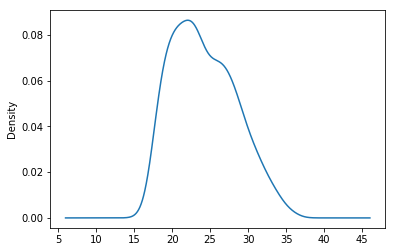

In [24]:
import matplotlib.pyplot as plt
%matplotlib inline

# Convert fifa_df to fifa_df_germany_age_pandas DataFrame
fifa_df_germany_age_pandas = fifa_df_germany_age.toPandas()

# Plot the 'Age' density of Germany Players
fifa_df_germany_age_pandas['Age'].plot(kind='density')
plt.show()

### PySpark MLlib

PySpark MLlib can only support RDDs

In [26]:
# Import the library for ALS
from pyspark.mllib.recommendation import ALS, Rating

# Import the library for Logistic Regression
from pyspark.mllib.classification import LogisticRegressionWithLBFGS

# Import the library for Kmeans
from pyspark.mllib.clustering import KMeans

### Collaborative Filtering

In [27]:
# Load the data into RDD
data = sc.textFile("ratings.csv")

# Split the RDD 
ratings = data.map(lambda l: l.split(','))

# Transform the ratings RDD 
ratings_final = ratings.map(lambda line: Rating(int(line[0]), int(line[1]), float(line[2])))

# Split the data into training and test
training_data, test_data = ratings_final.randomSplit([0.8, 0.2])

In [28]:
# Create the ALS model on the training data
model = ALS.train(training_data, rank=10, iterations=10)

# Drop the ratings column 
testdata_no_rating = test_data.map(lambda p: (p[0], p[1]))

# Predict the model  
predictions = model.predictAll(testdata_no_rating)

# Print the first rows of the RDD
predictions.take(2)

Py4JJavaError: An error occurred while calling z:org.apache.spark.api.python.PythonRDD.runJob.
: org.apache.spark.SparkException: Job aborted due to stage failure: Task 0 in stage 29.0 failed 1 times, most recent failure: Lost task 0.0 in stage 29.0 (TID 243, localhost, executor driver): org.apache.spark.SparkException: Python worker failed to connect back.
	at org.apache.spark.api.python.PythonWorkerFactory.createSimpleWorker(PythonWorkerFactory.scala:170)
	at org.apache.spark.api.python.PythonWorkerFactory.create(PythonWorkerFactory.scala:97)
	at org.apache.spark.SparkEnv.createPythonWorker(SparkEnv.scala:117)
	at org.apache.spark.api.python.BasePythonRunner.compute(PythonRunner.scala:108)
	at org.apache.spark.api.python.PythonRDD.compute(PythonRDD.scala:65)
	at org.apache.spark.rdd.RDD.computeOrReadCheckpoint(RDD.scala:324)
	at org.apache.spark.rdd.RDD.iterator(RDD.scala:288)
	at org.apache.spark.scheduler.ResultTask.runTask(ResultTask.scala:90)
	at org.apache.spark.scheduler.Task.run(Task.scala:121)
	at org.apache.spark.executor.Executor$TaskRunner$$anonfun$10.apply(Executor.scala:402)
	at org.apache.spark.util.Utils$.tryWithSafeFinally(Utils.scala:1360)
	at org.apache.spark.executor.Executor$TaskRunner.run(Executor.scala:408)
	at java.base/java.util.concurrent.ThreadPoolExecutor.runWorker(Unknown Source)
	at java.base/java.util.concurrent.ThreadPoolExecutor$Worker.run(Unknown Source)
	at java.base/java.lang.Thread.run(Unknown Source)
Caused by: java.net.SocketTimeoutException: Accept timed out
	at java.base/java.net.DualStackPlainSocketImpl.waitForNewConnection(Native Method)
	at java.base/java.net.DualStackPlainSocketImpl.socketAccept(Unknown Source)
	at java.base/java.net.AbstractPlainSocketImpl.accept(Unknown Source)
	at java.base/java.net.PlainSocketImpl.accept(Unknown Source)
	at java.base/java.net.ServerSocket.implAccept(Unknown Source)
	at java.base/java.net.ServerSocket.accept(Unknown Source)
	at org.apache.spark.api.python.PythonWorkerFactory.createSimpleWorker(PythonWorkerFactory.scala:164)
	... 14 more

Driver stacktrace:
	at org.apache.spark.scheduler.DAGScheduler.org$apache$spark$scheduler$DAGScheduler$$failJobAndIndependentStages(DAGScheduler.scala:1887)
	at org.apache.spark.scheduler.DAGScheduler$$anonfun$abortStage$1.apply(DAGScheduler.scala:1875)
	at org.apache.spark.scheduler.DAGScheduler$$anonfun$abortStage$1.apply(DAGScheduler.scala:1874)
	at scala.collection.mutable.ResizableArray$class.foreach(ResizableArray.scala:59)
	at scala.collection.mutable.ArrayBuffer.foreach(ArrayBuffer.scala:48)
	at org.apache.spark.scheduler.DAGScheduler.abortStage(DAGScheduler.scala:1874)
	at org.apache.spark.scheduler.DAGScheduler$$anonfun$handleTaskSetFailed$1.apply(DAGScheduler.scala:926)
	at org.apache.spark.scheduler.DAGScheduler$$anonfun$handleTaskSetFailed$1.apply(DAGScheduler.scala:926)
	at scala.Option.foreach(Option.scala:257)
	at org.apache.spark.scheduler.DAGScheduler.handleTaskSetFailed(DAGScheduler.scala:926)
	at org.apache.spark.scheduler.DAGSchedulerEventProcessLoop.doOnReceive(DAGScheduler.scala:2108)
	at org.apache.spark.scheduler.DAGSchedulerEventProcessLoop.onReceive(DAGScheduler.scala:2057)
	at org.apache.spark.scheduler.DAGSchedulerEventProcessLoop.onReceive(DAGScheduler.scala:2046)
	at org.apache.spark.util.EventLoop$$anon$1.run(EventLoop.scala:49)
	at org.apache.spark.scheduler.DAGScheduler.runJob(DAGScheduler.scala:737)
	at org.apache.spark.SparkContext.runJob(SparkContext.scala:2061)
	at org.apache.spark.SparkContext.runJob(SparkContext.scala:2082)
	at org.apache.spark.SparkContext.runJob(SparkContext.scala:2101)
	at org.apache.spark.api.python.PythonRDD$.runJob(PythonRDD.scala:153)
	at org.apache.spark.api.python.PythonRDD.runJob(PythonRDD.scala)
	at java.base/jdk.internal.reflect.NativeMethodAccessorImpl.invoke0(Native Method)
	at java.base/jdk.internal.reflect.NativeMethodAccessorImpl.invoke(Unknown Source)
	at java.base/jdk.internal.reflect.DelegatingMethodAccessorImpl.invoke(Unknown Source)
	at java.base/java.lang.reflect.Method.invoke(Unknown Source)
	at py4j.reflection.MethodInvoker.invoke(MethodInvoker.java:244)
	at py4j.reflection.ReflectionEngine.invoke(ReflectionEngine.java:357)
	at py4j.Gateway.invoke(Gateway.java:282)
	at py4j.commands.AbstractCommand.invokeMethod(AbstractCommand.java:132)
	at py4j.commands.CallCommand.execute(CallCommand.java:79)
	at py4j.GatewayConnection.run(GatewayConnection.java:238)
	at java.base/java.lang.Thread.run(Unknown Source)
Caused by: org.apache.spark.SparkException: Python worker failed to connect back.
	at org.apache.spark.api.python.PythonWorkerFactory.createSimpleWorker(PythonWorkerFactory.scala:170)
	at org.apache.spark.api.python.PythonWorkerFactory.create(PythonWorkerFactory.scala:97)
	at org.apache.spark.SparkEnv.createPythonWorker(SparkEnv.scala:117)
	at org.apache.spark.api.python.BasePythonRunner.compute(PythonRunner.scala:108)
	at org.apache.spark.api.python.PythonRDD.compute(PythonRDD.scala:65)
	at org.apache.spark.rdd.RDD.computeOrReadCheckpoint(RDD.scala:324)
	at org.apache.spark.rdd.RDD.iterator(RDD.scala:288)
	at org.apache.spark.scheduler.ResultTask.runTask(ResultTask.scala:90)
	at org.apache.spark.scheduler.Task.run(Task.scala:121)
	at org.apache.spark.executor.Executor$TaskRunner$$anonfun$10.apply(Executor.scala:402)
	at org.apache.spark.util.Utils$.tryWithSafeFinally(Utils.scala:1360)
	at org.apache.spark.executor.Executor$TaskRunner.run(Executor.scala:408)
	at java.base/java.util.concurrent.ThreadPoolExecutor.runWorker(Unknown Source)
	at java.base/java.util.concurrent.ThreadPoolExecutor$Worker.run(Unknown Source)
	... 1 more
Caused by: java.net.SocketTimeoutException: Accept timed out
	at java.base/java.net.DualStackPlainSocketImpl.waitForNewConnection(Native Method)
	at java.base/java.net.DualStackPlainSocketImpl.socketAccept(Unknown Source)
	at java.base/java.net.AbstractPlainSocketImpl.accept(Unknown Source)
	at java.base/java.net.PlainSocketImpl.accept(Unknown Source)
	at java.base/java.net.ServerSocket.implAccept(Unknown Source)
	at java.base/java.net.ServerSocket.accept(Unknown Source)
	at org.apache.spark.api.python.PythonWorkerFactory.createSimpleWorker(PythonWorkerFactory.scala:164)
	... 14 more
